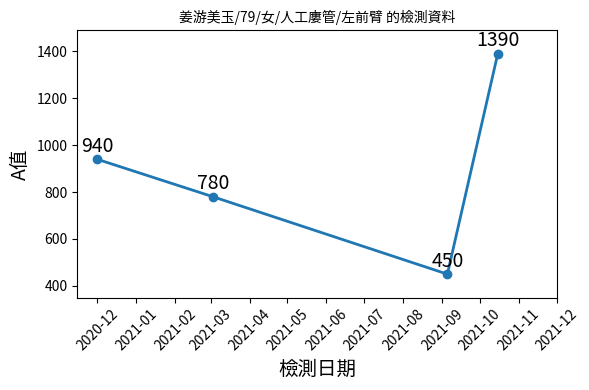

In [102]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import pandas as pd

# 明確指定字體路徑
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"
font_prop = fm.FontProperties(fname=font_path)

# 範例數據
dates = ['2020-12-01', '2021-03-03', '2021-09-05', '2021-10-15']
a_values = [940, 780, 450, 1390]

name = '姜游美玉'
age = '79'
gender = '女'
tb = '人工廔管'
part = '左前臂'

# 將日期轉換為 datetime 格式
dates_datetime = pd.to_datetime(dates)

# 自動偵測第一筆與最後一筆日期，並生成所有月份
start_date = dates_datetime.min().replace(day=1)  # 第一筆日期所在月份的第一天
end_date = (dates_datetime.max().replace(day=1) + pd.offsets.MonthBegin(2))  # 最後一筆日期的下個月

# 補齊中間月份
all_months = pd.date_range(start=start_date, end=end_date, freq='MS')  # 每月的第一天

# 繪製折線圖，設定背景透明
fig, ax = plt.subplots(figsize=(6, 4))
fig.patch.set_alpha(0)  # 整體背景透明

plt.plot(dates_datetime, a_values, marker='o', label='A值', linewidth=2)

# 添加數值標註，調整位置避免數字超出圖表
for i, (date, value) in enumerate(zip(dates_datetime, a_values)):
    plt.text(date, value + 100, f'{value}', ha='center', va='top', fontsize=14, fontproperties=font_prop)

# 計算 y 軸範圍
y_max = max(a_values) + 100
y_min = min(a_values) - 100
plt.ylim(y_min, y_max)

# 設定標題和軸標籤
plt.title(f'{name}/{age}/{gender}/{tb}/{part} 的檢測資料', fontsize=24, fontproperties=font_prop)
plt.xlabel('檢測日期', fontsize=14, fontproperties=font_prop)
plt.ylabel('A值', fontsize=14, fontproperties=font_prop)

# 設定 X 軸刻度和格線
ax.set_xticks(all_months)  # 使用生成的月份範圍作為 X 軸刻度
ax.set_xticklabels([date.strftime('%Y-%m') for date in all_months], fontproperties=font_prop, rotation=45)  # 格式化刻度
# plt.grid(axis='x', linestyle='--', alpha=0.5)  # 增加 X 軸格線

# 去掉背景格線
plt.yticks(fontproperties=font_prop)
plt.tight_layout()

# 顯示圖表
plt.show()
